# Chest X-Ray Images (Pneumonia)

* 데이터 셋
* https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

* 필사 노트북
* https://www.kaggle.com/code/aakashnain/beating-everything-with-depthwise-convolution

In [1]:
# !unzip 'chest_xray.zip'

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

print(os.listdir("chest-xray-pneumonia"))

['train', 'val', 'chest_xray', 'test', '__MACOSX']


In [3]:
import tensorflow as tf

In [4]:
# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

```python
os.environ['PYTHONHASHSEED'] = '0'
```
이 코드는 Python의 os 모듈에서 environ이라는 변수를 사용하여 현재 시스템의 환경 변수에 액세스하고, 그 중 PYTHONHASHSEED라는 변수를 0으로 설정하는 역할  

Python은 해시 기반의 데이터 구조를 사용하며, 해시 값은 일반적으로 임의의 수를 기반으로 계산됩니다. 그러나 Python의 해시 함수는 실행할 때마다 다른 결과를 반환하도록 설계되어 있습니다. 이는 예측 불가능한 결과를 얻기 위해 사용됩니다.

<u>하지만 때로는 해시 결과를 예측 가능하게 만들어야 할 경우가 있습니다. 이를 위해 PYTHONHASHSEED 환경 변수를 설정할 수 있습니다. PYTHONHASHSEED를 0으로 설정하면 해시 함수가 실행될 때마다 동일한 해시 값이 생성되도록 보장됩니다. 이는 특히 테스트나 디버깅 시에 유용합니다.</u>

In [5]:
# Set the numpy seed
import numpy as np

np.random.seed(111)

```python
np.random.seed(111)
```

이 코드는 NumPy 패키지에서 제공하는 random 모듈에서 seed() 함수를 사용하여 난수 발생기의 시드 값을 111로 설정하는 역할을 합니다.

<u>시드 값은 난수 생성 알고리즘에서 사용되는 초기값으로, 동일한 시드 값을 가지고 있는 경우에는 항상 동일한 난수 시퀀스가 생성됩니다. 이는 실험의 재현성과 결과의 예측 가능성을 보장하는 데 유용합니다.</u>

따라서 이 코드는 NumPy의 난수 생성기를 사용하여 생성된 난수 시퀀스를 재현할 수 있도록 보장합니다. 이는 예측 가능한 실험 결과나 모델의 재현 가능성을 필요로하는 경우에 유용합니다.

In [6]:
# Disable multi-threading in tensorflow ops
import tensorflow.compat.v1 as tf

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

```python
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
```
여기서 설정한 intra_op_parallelism_threads와 inter_op_parallelism_threads는 각각 연산 내부의 스레드 병렬성과 연산 간 스레드 병렬성을 제어합니다. <u>따라서 이 코드는 TensorFlow 세션의 병렬성을 1로 제한하여 실행 시간 및 메모리 사용량을 최적화하는 데 유용합니다.</u>

In [7]:
# Set the random seed in tensorflow at graph level
tf.set_random_seed(111)

In [8]:
# Define a tensorflow session with above session configs
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)

2023-04-24 11:47:17.033714: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 11:47:17.926598: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3497 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:1e:00.0, compute capability: 7.5


```python
graph=tf.get_default_graph()
```
현재 기본 그래프(default graph)를 사용하도록 설정합니다.TensorFlow에서는 여러 개의 그래프를 사용할 수 있지만, 일반적으로 하나의 그래프를 사용하는 경우가 많습니다.

```python
config=session_conf
```
인수를 통해 이전에 설정한 session_conf 변수에 저장된 세션 구성을 적용합니다.

<u>따라서, 이 코드는 TensorFlow 세션을 생성하고, 세션에 session_conf 변수에 저장된 구성을 적용하여 그래프를 실행할 때 적절한 병렬성을 적용합니다. 이는 세션의 성능을 최적화하고 메모리 사용량을 제한하는 데 도움이 됩니다.</u>

In [9]:
# Set the session in keras
from keras import backend as K

K.set_session(sess)

```python
K.set_session(sess)
```
<u>이 코드는 Keras에서 TensorFlow 백엔드를 사용할 때, 현재 TensorFlow 세션을 Keras 백엔드와 연결하는 역할을 합니다.</u>

Keras는 딥러닝 모델을 구성하고 학습하는 데 사용되는 고수준 라이브러리입니다. Keras는 백엔드로 TensorFlow, CNTK, Theano 등 여러 딥러닝 프레임워크를 지원합니다. 따라서, TensorFlow를 백엔드로 사용하는 경우, Keras에서 TensorFlow 세션과 연결해야 합니다.

from keras import backend as K 구문을 사용하여 Keras의 백엔드 모듈에서 backend 객체를 가져옵니다. 그리고 K.set_session(sess) 함수를 호출하여 TensorFlow 백엔드와 현재 세션을 연결합니다.

In [12]:
# ! pip install imgaug

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 948 kB 12.0 MB/s            


<u>imgaug 라이브러리는 이미지 데이터를 증강하는 기능을 제공하는 라이브러리입니다.</u> 딥러닝 모델을 학습시킬 때 데이터를 더 많이 사용할 수 있도록 이미지 데이터를 변형하거나, 회전, 크기 조정, 반전 등 다양한 형태의 변환을 적용하여 데이터를 증강하는 것이 일반적입니다. 이러한 데이터 증강은 딥러닝 모델의 성능을 향상시키는 데 중요한 역할을 합니다.

In [13]:
# Make the augmentation sequence deterministic
import imgaug as aug

aug.seed(111)

데이터 세트는 1) 훈련 세트 2) 유효성 검사 세트 3) 테스트 세트의 세 가지로 나뉩니다. 데이터 세트를 가져와 보겠습니다.

In [14]:
# Define path to the data directory
from pathlib import Path

data_dir = Path('chest-xray-pneumonia/chest_xray')

In [15]:
# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

In [16]:
# Path to validation directory
val_dir = data_dir / 'val'

In [17]:
# Path to test directory
test_dir = data_dir / 'test'

먼저 훈련 데이터 세트를 살펴볼 것입니다. 몇 가지 샘플을 살펴보고, 각 클래스의 샘플 수를 확인하는 등 몇 가지 분석을 해보겠습니다. 해봅시다.  

위의 각 디렉터리에는 두 개의 하위 디렉터리가 있습니다.  

* 정상: 정상(폐렴이 없는) 사례를 설명하는 샘플입니다. 
* 폐렴: 이 디렉토리에는 폐렴 사례인 샘플이 들어 있습니다.

In [18]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

In [19]:
# Get the list of all the images
from glob import glob
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

In [20]:
# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

In [21]:
# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

In [22]:
# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

In [23]:
# Get a pandas dataframe from the data we have in our list 
import pandas as pd

train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

In [24]:
# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

In [25]:
# How the dataframe looks like?
train_data.head()

,image,label
0,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,0
1,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,0
2,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1
3,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1
4,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1


**데이터 세트에 각 클래스에 대한 샘플이 몇 개 있나요?**

In [26]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

1    3875
0    1341
Name: label, dtype: int64


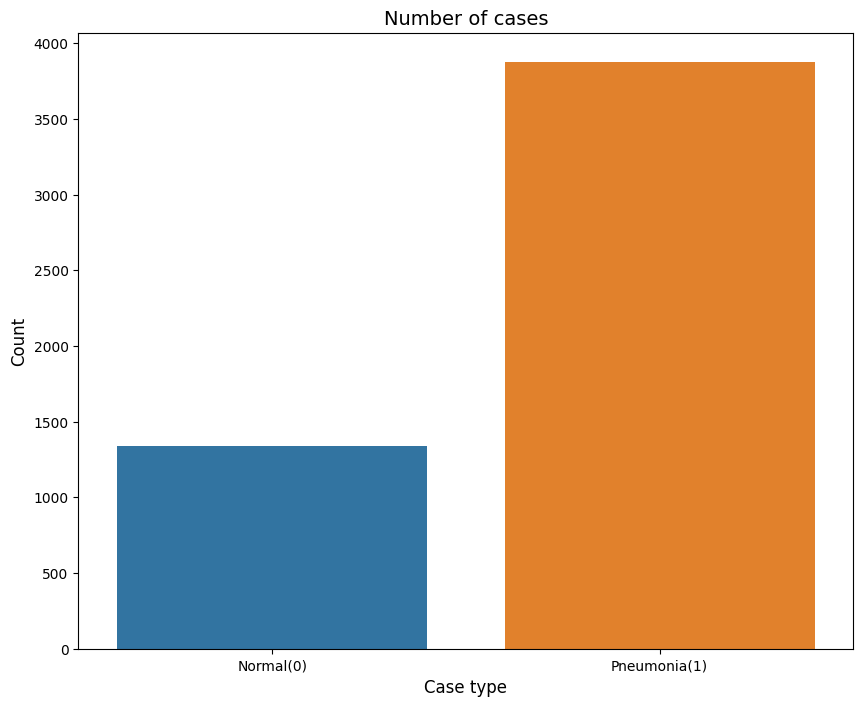

In [27]:
# Plot the results 
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

보시다시피 데이터는 매우 불균형합니다. 일반 사례에 비해 폐렴 사례가 거의 세 배나 많습니다. 의료 데이터의 경우 이러한 상황은 매우 정상입니다. 정상 사례가 너무 많거나 질병이 있는 사례가 너무 많으면 데이터는 항상 불균형 상태가 됩니다.  

정상 사례와 폐렴 사례가 어떻게 다른지 살펴봅시다. 훈련 데이터 자체에서 몇 가지 샘플을 살펴보겠습니다.

In [28]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

In [29]:
# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

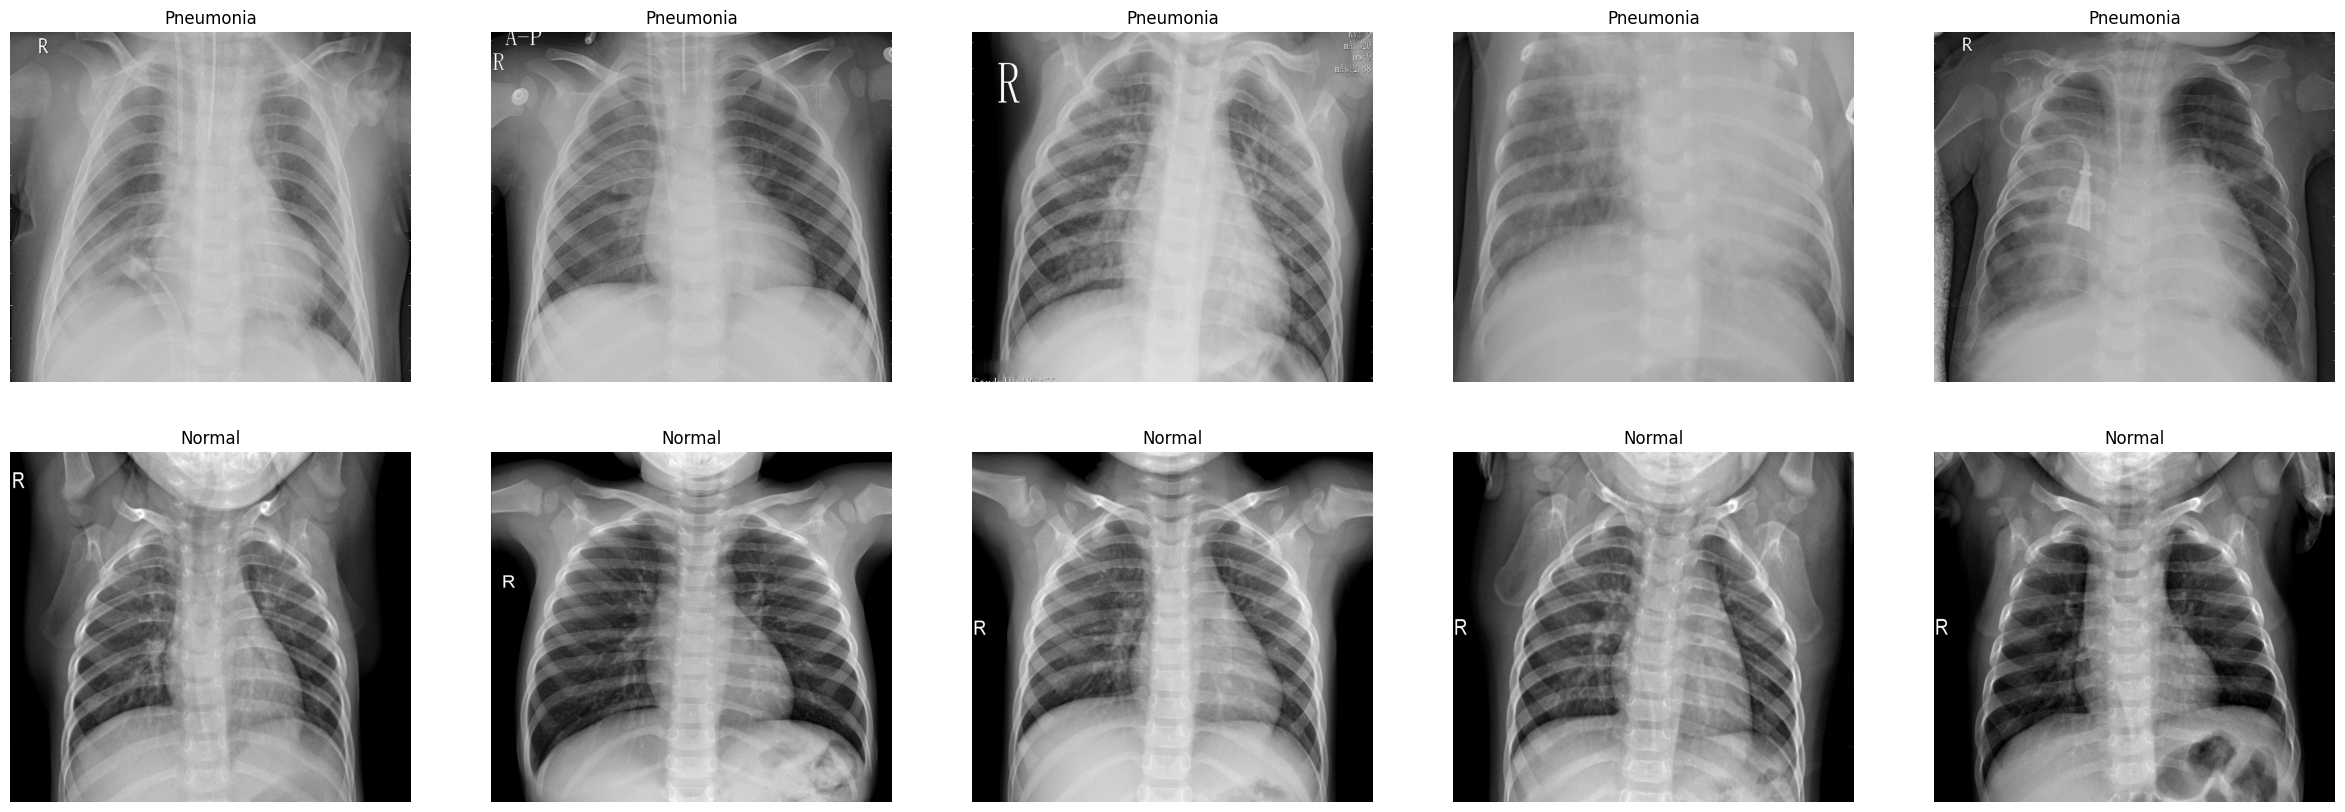

In [30]:
# Plot the data 
from skimage.io import imread
from skimage.transform import resize

f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

주의 깊게 살펴보면 육안으로 정상 사례와 폐렴 사례를 구별 할 수없는 경우가 있습니다. 위의 그림에서 적어도 저에게는 너무 혼란스러운 경우가 하나 있습니다. 강력한 분류기를 만들 수 있다면 의사에게도 큰 도움이 될 것입니다.

**유효성 검사 데이터 준비하기**  
나중에 노트북에서 학습 데이터 세트에 대한 생성기를 정의할 예정이지만 유효성 검사 데이터가 작기 때문에 생성기 없이도 이미지를 읽을 수 있고 데이터를 로드할 수 있습니다. 이것이 바로 아래 코드 블록이 하는 일입니다.

In [31]:
# Get the path to the sub-directories
normal_cases_dir = val_dir / 'NORMAL'
pneumonia_cases_dir = val_dir / 'PNEUMONIA'

In [32]:
# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

In [33]:
# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []

In [34]:
# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 224x224 
import cv2
from keras.utils import to_categorical

# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img)) # 파일경로 'img' 를 문자열로 변환하여 이미지 파일을 읽기
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1: # 채널 수가 1인 경우 즉, 흑백이미지인 경우
        img = np.dstack([img, img, img]) # 컬러 이미지로 변환
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 에서 RGB 로 변환
    img = img.astype(np.float32)/255. # 딥러닝이 처리할 수 있는 데이터 타입이 부동소수점, 가중치 업데이트 과정에서 정수형태면 에러 발생할 수 있음
    label = to_categorical(0, num_classes=2) # 0이라는 레이블을 2개의 클래스 중 첫 번째 클래스에 해당하는 [1, 0]형태의 원-핫 벡터로 변환
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print("Total number of validation examples: ", valid_data.shape)
print("Total number of labels:", valid_labels.shape)

Total number of validation examples:  (16, 224, 224, 3)
Total number of labels: (16, 2)


(16, 224, 224, 3)
<u>여기서, 첫 번째 차원은 배치 크기(batch size)를 의미하며, 총 16개의 이미지가 하나의 배치로 처리된 것을 나타냅니다.</u>

두 번째와 세 번째 차원은 이미지의 높이(height)와 너비(width)를 나타냅니다. 즉, 이미지가 224x224 크기로 리사이즈되었다는 것을 나타냅니다.

네 번째 차원은 이미지의 색상 채널 수를 나타냅니다. 여기서는 RGB 이미지를 사용하므로, 총 3개의 색상 채널(Red, Green, Blue)이 사용되어 3이라는 값이 나타납니다.

따라서, (16, 224, 224, 3)의 크기는 총 16개의 이미지가 각각 224x224 크기의 RGB 이미지임을 나타냅니다.

**증강**  
데이터 증강은 거의 모든 경우에 모델의 견고성을 개선하는 데 도움이 되는 강력한 기술입니다. 하지만 데이터 세트가 불균형한 경우 증강이 훨씬 더 유용할 수 있습니다. 샘플링되지 않은 클래스의 다양한 샘플을 생성하여 전체 분포의 균형을 맞출 수 있습니다.  

저는 imgaug를 아주 좋아합니다. 매우 깔끔한 API와 함께 제공되며, 이를 통해 엄청난 증강을 할 수 있습니다. 살펴볼 가치가 있습니다!! 다음 코드 블록에서는 증강 시퀀스를 정의하겠습니다. Oneof가 바로 그 역할을 합니다. 각 반복마다 세 가지 증강 기법 중 하나의 증강 기법을 취해 샘플에 적용합니다.

In [35]:
# Augmentation sequence 
import imgaug.augmenters as iaa

seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=20), # roatation
    iaa.Multiply((1.2, 1.5))]) #random brightness

```python
iaa.OneOf()
```
주어진 Augmenters 클래스의 목록 중에서 랜덤하게 하나를 선택하여 이미지에 적용하는 함수입니다.

```python
iaa.Fliplr()
```
함수는 입력 이미지를 좌우 반전시킵니다.

```python
iaa.Affine()
```
함수는 입력 이미지에 Affine Transformation(이동, 회전, 크기 조절 등)을 적용합니다. rotate 인자를 사용하여 입력 이미지를 회전시킵니다.
```python
iaa.Multiply()
```
함수는 입력 이미지에 임의의 랜덤값으로 곱셈 연산을 수행하여 밝기를 변화시킵니다. 1.2에서 1.5 사이의 값을 곱하도록 설정

**훈련 데이터 생성기**  
여기서는 아주 간단한 데이터 생성기를 정의하겠습니다. 원한다면 이보다 더 많은 기능을 추가할 수 있지만, 현재로서는 이 정도면 충분하다고 생각합니다.

In [36]:
def data_gen(data, batch_size):
    # Get total number of samples in the data
    n = len(data)
    steps = n//batch_size
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
    batch_labels = np.zeros((batch_size,2), dtype=np.float32)

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Initialize a counter
    i =0
    while True:
        np.random.shuffle(indices)
        # Get the next batch 
        count = 0
        next_batch = indices[(i*batch_size):(i+1)*batch_size]
        for j, idx in enumerate(next_batch):
            img_name = data.iloc[idx]['image']
            label = data.iloc[idx]['label']
            
            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(str(img_name))
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img])
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
            
            # generating more samples of the undersampled class
            if label==0 and count < batch_size-2:
                aug_img1 = seq.augment_image(img)
                aug_img2 = seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.

                batch_data[count+1] = aug_img1
                batch_labels[count+1] = encoded_label
                batch_data[count+2] = aug_img2
                batch_labels[count+2] = encoded_label
                count +=2
            
            else:
                count+=1
            
            if count==batch_size-1:
                break
            
        i+=1
        yield batch_data, batch_labels 
        # yield 키워드가 호출되면 해당 값이 반환되고 함수가 일시 중지됩니다.
        # 그러나 함수의 로컬 변수와 상태는 보존됩니다.
        # 함수가 다시 호출되면 마지막으로 실행되었던 지점부터 다시 시작하고, 다음 값이 생성되고 yield 키워드에 도달할 때까지 실행됩니다.
        # 이를 반복하면 제너레이터는 호출될 때마다 값을 생성하는 함수로 작동합니다.
            
        if i>=steps:
            i=0

```python
    # Get total number of samples in the data
    n = len(data)
    steps = n//batch_size
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
    batch_labels = np.zeros((batch_size,2), dtype=np.float32)

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Initialize a counter
    i =0
```
<u>위 코드는 데이터를 mini-batch 단위로 가져오기 위한 과정입니다.</u>

우선, 데이터셋의 전체 크기를 n 변수에 저장합니다. 그리고 batch_size에 정의된 크기만큼의 데이터를 가져오기 위해 필요한 총 mini-batch 수를 steps 변수에 저장합니다.

이어서 batch_data와 batch_labels 두 개의 NumPy 배열을 초기화합니다. batch_data는 실제로 학습에 사용될 이미지 데이터를 담는 배열로, 크기는 batch_size x 224 x 224 x 3 입니다. <u>batch_labels는 이 이미지 데이터에 해당하는 라벨 정보를 담는 배열로, 크기는 batch_size x 2 입니다. 여기서 2는 이진 분류를 수행할 때, 클래스의 개수를 나타내는데, 이 경우에는 정상과 비정상을 구분하는 2개의 클래스가 있으므로 크기가 2로 설정됩니다.</u>

<u>그리고 indices 배열에는 데이터셋의 인덱스 값들이 저장됩니다. 이 배열을 사용하여 mini-batch 단위로 데이터를 가져올 때 사용합니다.</u>

마지막으로, i 변수를 초기화합니다. 이 변수는 mini-batch 단위로 데이터를 가져오는 과정에서 현재 어떤 인덱스에서 데이터를 가져와야 하는지를 나타내는데, 처음에는 0으로 초기화합니다.
```python
    while True:
        np.random.shuffle(indices)
        # Get the next batch 
        count = 0
        next_batch = indices[(i*batch_size):(i+1)*batch_size]
        for j, idx in enumerate(next_batch):
            img_name = data.iloc[idx]['image']
            label = data.iloc[idx]['label']
            
            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(str(img_name))
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img])
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
```
<u>위 코드는 데이터셋에서 배치(batch) 단위로 이미지와 레이블을 읽어오기 위한 데이터 제너레이터(generator) 함수입니다.</u> while True: 루프를 돌면서 데이터를 계속 읽어오며, np.random.shuffle(indices)를 통해 데이터 인덱스들을 랜덤하게 섞어줍니다. <u>그 후, next_batch 변수에 배치 시작 인덱스부터 배치 끝 인덱스까지 인덱스 리스트를 슬라이싱하여 저장합니다.</u>

for j, idx in enumerate(next_batch): 루프에서 idx는 next_batch 리스트에 있는 인덱스 값을 가리키며, img_name과 label은 해당 인덱스에 해당하는 이미지 파일 이름과 레이블 값을 읽어옵니다. 그 후, to_categorical 함수를 이용해 레이블을 원핫 인코딩(one-hot encoding) 형태로 변환합니다.

cv2.imread 함수를 이용해 이미지 파일을 읽어온 후, cv2.resize 함수를 이용해 이미지 크기를 (224, 224)로 조정합니다. 만약 이미지 채널 값(img.shape[2])이 1이라면, 해당 이미지를 3개의 채널 값으로 만들기 위해 np.dstack([img, img, img]) 코드를 통해 이미지의 채널 값을 3으로 만듭니다. 이후, cv2.cvtColor 함수를 이용해 이미지 색상 채널을 BGR에서 RGB로 바꾸고, 이미지 픽셀 값을 0과 1 사이로 정규화(normalization)합니다.

마지막으로, batch_data와 batch_labels에 현재 배치(batch)에 해당하는 이미지와 레이블 값을 넣습니다. 배치에 해당하는 이미지와 레이블 값이 모두 저장되면, 해당 배치를 yield 구문을 이용해 반환합니다. 이후, i 변수를 증가시켜 다음 배치의 시작 인덱스를 지정해주고, 모든 데이터를 한 번 다 읽어왔을 경우 다시 처음부터 읽어오기 위해 i=0으로 초기화합니다.
```python
            # generating more samples of the undersampled class
            if label==0 and count < batch_size-2:
                aug_img1 = seq.augment_image(img)
                aug_img2 = seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.

                batch_data[count+1] = aug_img1
                batch_labels[count+1] = encoded_label
                batch_data[count+2] = aug_img2
                batch_labels[count+2] = encoded_label
                count +=2
            
            else:
                count+=1
            
            if count==batch_size-1:
                break
            
        i+=1
        yield batch_data, batch_labels
            
        if i>=steps:
            i=0
```
<u>이 부분은 데이터 증강을 수행하고 배치 데이터와 라벨을 생성하여 yield 구문을 사용해 반환하는 부분입니다.</u>

label 변수가 0인 경우 (즉, 양성 클래스가 아닌 경우) 데이터 증강을 수행하여 새로운 샘플을 만듭니다. 이 때 seq.augment_image() 함수를 사용해 이미지에 다양한 변환을 적용하고, 생성된 이미지를 RGB 색상 공간으로 변환한 뒤 0~1 사이의 값을 가지도록 정규화합니다.

batch_data와 batch_labels 배열에 증강된 이미지와 라벨을 추가합니다. 이때 count 변수는 이미지와 라벨을 추가할 위치를 지정하는 역할을 합니다. 새로 추가된 이미지와 라벨은 count+1과 count+2의 위치에 저장됩니다.

그 외의 경우에는 기존의 이미지와 라벨을 batch_data와 batch_labels 배열에 추가합니다.

count 변수는 이미지와 라벨을 추가한 개수를 세는 변수이며, batch_size보다 작을 때까지 이미지와 라벨을 추가합니다. count가 batch_size-1이 되면, 이미지와 라벨을 모두 채웠으므로 break 구문을 사용하여 루프를 종료합니다.

yield 구문은 batch_data와 batch_labels 배열을 반환하며, i 변수를 증가시킵니다. i 변수는 배치 데이터를 몇 번 반환했는지를 기록하는 변수입니다.

마지막으로 i가 steps보다 크거나 같아지면, i를 0으로 초기화합니다. 이는 데이터셋을 한 번 모두 사용하였을 때 다시 처음부터 사용하기 위함입니다.

**모델**  
이것이 가장 좋은 부분입니다. 이 데이터 세트의 다른 커널을 보면 모두가 전이 학습과 미세 조정에 바쁘게 움직이고 있습니다. 전이 학습을 하되 현명하게 해야 합니다. 우리는 부분적인 전이 학습을 하고 나머지 모델은 처음부터 다시 학습할 것입니다. 이에 대해서는 나중에 자세히 설명하겠지만, 그 전에 제한된 데이터로 딥러닝 모델을 처음부터 구축하는 모범 사례 중 하나를 공유하고자 합니다.  

* 간단한 아키텍처를 선택합니다. 
* 이미지넷에서 사전 학습된 네트워크에서 처음 몇 개의 레이어를 초기화합니다. 처음 몇 개의 레이어는 색상 얼룩, 패치, 가장자리 등과 같은 일반적인 세부 사항을 캡처하기 때문입니다. 이러한 레이어의 가중치를 무작위로 초기화하는 대신 미세 조정하는 것이 훨씬 좋습니다. 
* 더 적은 수의 매개 변수를 도입하는 레이어를 선택합니다. 예를 들어 Depthwise SeparableConv는 Conv 레이어를 대체할 수 있는 좋은 레이어입니다. 일반 컨볼루션에 비해 매개변수 수가 적고 각 채널에 다른 필터가 적용되므로 더 많은 정보를 캡처할 수 있습니다. 강력한 네트워크인 Xception은 이러한 레이어 위에만 구축됩니다. 이 백서에서 Xception과 심층 분리 컨볼루션에 대해 자세히 알아볼 수 있습니다. 
* 컨볼루션에는 배치 노멀을 사용합니다. 네트워크가 깊어질수록 배치 노름이 중요한 역할을 하기 시작합니다. 
* 적절한 수의 뉴런으로 조밀한 레이어를 추가합니다. 더 높은 학습 속도로 훈련하고 고밀도 레이어의 뉴런 수를 실험합니다. 네트워크의 깊이에 대해서도 이 작업을 수행합니다. 
* 좋은 깊이를 알게 되면 감쇠와 함께 더 낮은 학습률로 네트워크 훈련을 시작합니다.  
  
이것이 다음 코드 블록에서 제가 수행한 모든 작업입니다.

In [37]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import BatchNormalization
from keras.models import Model

def build_model():
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling2D((2,2), name='pool1')(x)
    
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)
    
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)
    
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1')(x)
    x = BatchNormalization(name='bn3')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2')(x)
    x = BatchNormalization(name='bn4')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3')(x)
    x = MaxPooling2D((2,2), name='pool4')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(1024, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout1')(x)
    x = Dense(512, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(2, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

Conv2D와 SeparableConv2D는 모두 딥러닝에서 자주 사용되는 합성곱(Convolution) 연산입니다. 하지만 두 연산의 구조와 특징은 다릅니다.

<u>Conv2D는 기본적인 합성곱 연산으로, 입력 데이터와 가중치 행렬을 합성곱한 후 편향을 더해줍니다. 이 때, 입력 데이터의 모든 채널과 가중치의 모든 필터가 동시에 합성곱을 진행합니다. 이에 따라 연산량이 많아지는 문제가 있습니다.</u>

<u>SeparableConv2D는 Conv2D의 연산량 문제를 해결하기 위한 대안입니다. SeparableConv2D는 두 단계의 연산을 통해 입력 데이터와 필터를 합성곱합니다. 첫 번째 단계에서는 입력 데이터의 각 채널에 따로따로 공간 방향의 합성곱을 진행합니다. 두 번째 단계에서는 각 채널별로 합성곱한 결과에 대해 다시 채널 방향의 합성곱을 진행합니다. 이 과정을 거치면서 연산량이 크게 줄어들게 됩니다.</u>

따라서, SeparableConv2D는 Conv2D보다 더 경량화된 모델을 만들기 위해 사용되며, 더 나은 성능을 보이기도 합니다. 하지만, 항상 더 나은 결과를 보장하지는 않으며, 데이터셋이나 모델 구조에 따라서 Conv2D가 더 나은 결과를 내기도 합니다.

In [38]:
model =  build_model()
model.summary()

2023-04-24 11:48:21.848453: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3497 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:1e:00.0, compute capability: 7.5


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ImageInput (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 Conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 Conv2_1 (SeparableConv2D)   (None, 112, 112, 128)     8896      
                                                                 
 Conv2_2 (SeparableConv2D)   (None, 112, 112, 128)     17664     
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

We will initialize the weights of first two convolutions with imagenet weights처음 두 컨볼루션의 가중치를 이미지넷 가중치로 초기화합니다.

In [39]:
import h5py

# Open the VGG16 weight file
f = h5py.File('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 'r')

# Select the layers for which you want to set weight.

w,b = f['block1_conv1']['block1_conv1_W_1:0'], f['block1_conv1']['block1_conv1_b_1:0']
model.layers[1].set_weights = [w,b]

w,b = f['block1_conv2']['block1_conv2_W_1:0'], f['block1_conv2']['block1_conv2_b_1:0']
model.layers[2].set_weights = [w,b]

w,b = f['block2_conv1']['block2_conv1_W_1:0'], f['block2_conv1']['block2_conv1_b_1:0']
model.layers[4].set_weights = [w,b]

w,b = f['block2_conv2']['block2_conv2_W_1:0'], f['block2_conv2']['block2_conv2_b_1:0']
model.layers[5].set_weights = [w,b]

f.close()
model.summary()    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ImageInput (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 Conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 Conv2_1 (SeparableConv2D)   (None, 112, 112, 128)     8896      
                                                                 
 Conv2_2 (SeparableConv2D)   (None, 112, 112, 128)     17664     
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

<u>해당 코드는 VGG16 모델의 가중치를 불러와서, 미리 정의한 모델의 일부 레이어에 적용하는 역할을 합니다.</u>

먼저 h5py 모듈을 사용하여 VGG16 모델의 가중치 파일을 엽니다. 그런 다음 f 변수에 파일을 저장합니다.

w, b = f[...]와 같은 코드는 VGG16 모델의 레이어에서 가져온 가중치와 편향을 w와 b 변수로 저장합니다.

마지막으로 model.layers[1].set_weights = [w,b]와 같은 코드는 미리 정의된 모델의 첫 번째 레이어의 가중치와 편향을 VGG16 모델의 첫 번째 레이어의 가중치와 편향으로 설정합니다. 이렇게 VGG16 모델의 가중치를 적용하면 미리 학습된 VGG16 모델에서 추출된 특성을 사용하여 새로운 작업에 더욱 적합한 모델을 학습할 수 있습니다.

In [40]:
# opt = RMSprop(lr=0.0001, decay=1e-6)
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

opt = Adam(lr=0.0001, decay=1e-5)
es = EarlyStopping(patience=5)
chkpt = ModelCheckpoint(filepath='best_model_todate.hdf5', save_best_only=True, save_weights_only=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=opt)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<u>ModelCheckpoint는 Keras에서 제공하는 콜백(callback) 함수 중 하나로, 모델 학습 중 일정한 간격으로 모델을 저장하는 역할을 합니다.</u>

위 코드에서 filepath는 모델 가중치를 저장할 경로와 파일 이름을 지정합니다. save_best_only는 모델이 validation set에서 가장 좋은 성능을 보였을 때만 모델을 저장할지 여부를 결정합니다. 만약 True로 설정되어 있다면, validation set에서 가장 좋은 성능을 보이지 않는다면 모델을 저장하지 않습니다. save_weights_only는 모델의 가중치만 저장할지 여부를 결정합니다. 이 값이 True로 설정되어 있다면, 모델의 아키텍처와 설정 등은 저장하지 않고 가중치만 저장합니다.

따라서 위 코드에서는 best_model_todate.hdf5라는 파일에 가장 좋은 성능을 보인 모델의 가중치만 저장하도록 설정되어 있습니다. 이렇게 저장된 모델 가중치는 나중에 모델을 다시 불러와 사용할 수 있습니다.

In [41]:
batch_size = 16
nb_epochs = 20

# Get a train data generator
train_data_gen = data_gen(data=train_data, batch_size=batch_size)

# Define the number of training steps
nb_train_steps = train_data.shape[0]//batch_size

print("Number of training and validation steps: {} and {}".format(nb_train_steps, len(valid_data)))

Number of training and validation steps: 326 and 16


노트북을 렌더링하는 동안 네트워크를 다시 트레이닝하고 한 시간 정도 기다려야 하기 때문에 현재로서는 트레이닝 단계를 주석 처리했습니다. 지금까지 얻은 가장 좋은 모델의 가중치를 업로드했습니다. 네트워크를 더 미세 조정할 때 자유롭게 사용하세요. 해당 가중치를 로드하고 해당 가중치만 사용하여 테스트 세트에서 추론을 실행할 것입니다. 하지만... 참고로 학습 단계의 스크린샷을 여기에 첨부하겠습니다.

In [42]:
# Fit the model
history = model.fit_generator(train_data_gen, epochs=nb_epochs, steps_per_epoch=nb_train_steps,
                              validation_data=(valid_data, valid_labels),callbacks=[es, chkpt],
                              class_weight={0:1.0, 1:0.4})

/tmp/ipykernel_297/3857689106.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=nb_epochs, steps_per_epoch=nb_train_steps,


Epoch 1/20


2023-04-24 11:49:12.365486: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


326/326 [==============================] - 138s 413ms/step - loss: 0.2369 - accuracy: 0.7471 - val_loss: 0.7942 - val_accuracy: 0.5000
Epoch 2/20
326/326 [==============================] - 105s 322ms/step - loss: 0.0770 - accuracy: 0.9511 - val_loss: 1.0203 - val_accuracy: 0.5000
Epoch 3/20
326/326 [==============================] - 95s 293ms/step - loss: 0.0585 - accuracy: 0.9630 - val_loss: 0.1876 - val_accuracy: 0.9375
Epoch 4/20
326/326 [==============================] - 88s 271ms/step - loss: 0.0430 - accuracy: 0.9735 - val_loss: 0.1050 - val_accuracy: 0.9375
Epoch 5/20
326/326 [==============================] - 85s 262ms/step - loss: 0.0412 - accuracy: 0.9709 - val_loss: 0.7740 - val_accuracy: 0.6875
Epoch 6/20
326/326 [==============================] - 84s 257ms/step - loss: 0.0387 - accuracy: 0.9716 - val_loss: 0.9808 - val_accuracy: 0.6250
Epoch 7/20
326/326 [==============================] - 83s 255ms/step - loss: 0.0328 - accuracy: 0.9780 - val_loss: 0.1213 - val_accuracy: 0

In [43]:
# Load the model weights
model.load_weights("best_model_todate.hdf5")

In [44]:
# Preparing test data
normal_cases_dir = test_dir / 'NORMAL'
pneumonia_cases_dir = test_dir / 'PNEUMONIA'

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
                      
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 224, 224, 3)
Total number of labels: (624, 2)


In [45]:
# Evaluation on test dataset
test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

39/39 [==============================] - 1s 23ms/step - loss: 1.0144 - accuracy: 0.8045
Loss on test set:  1.014351487159729
Accuracy on test set:  0.8044871687889099


In [46]:
# Get predictions
preds = model.predict(test_data, batch_size=16)
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(test_labels, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)

39/39 [==============================] - 1s 19ms/step
(624,)
(624,)


특정 문제에 불균형한 데이터 세트가 포함된 경우 정확도는 좋은 지표가 될 수 없습니다. 예를 들어, 데이터 세트에 부정적인 예가 95개, 긍정적인 예가 5개 포함되어 있는 경우 정확도가 95%인 모델은 전혀 의미가 없습니다. 분류기가 모든 예제를 부정으로 분류해도 여전히 95%의 정확도를 달성할 수 있기 때문입니다. 따라서 다른 지표를 찾아야 합니다. 정확도와 회수율은 이러한 종류의 문제에 매우 좋은 지표입니다.  

예측에서 혼동 행렬을 가져와서 모델의 정확도와 회수율이 얼마인지 확인하겠습니다.

<Figure size 640x480 with 0 Axes>

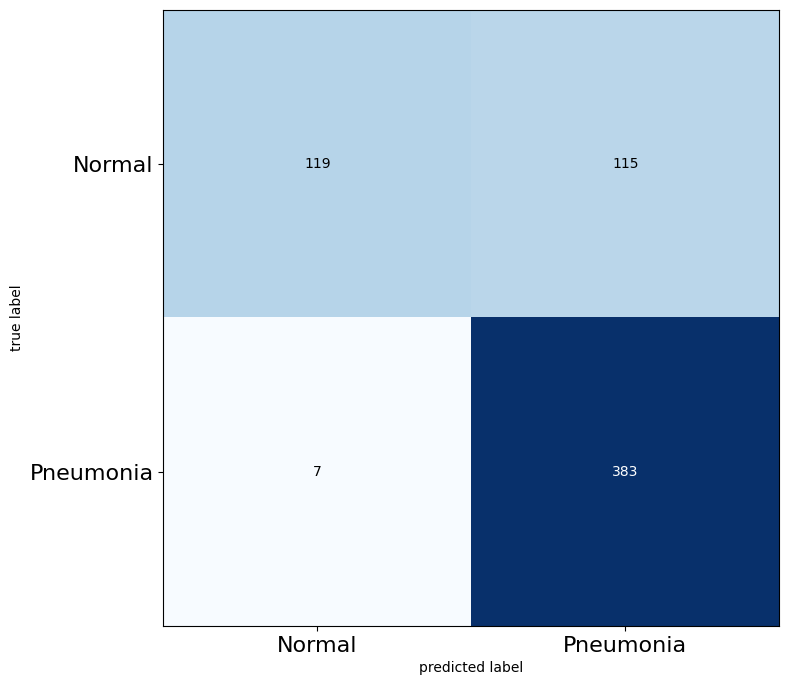

In [47]:
# Get the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(orig_test_labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [48]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.98
Precision of the model is 0.77


멋지네요!!! 따라서 우리 모델의 리콜률은 98%입니다. 이런 문제에서는 좋은 회상값이 예상됩니다. 하지만 눈여겨보면 정확도는 80%에 불과합니다. 여기서 한 가지 주의해야 할 점이 있습니다. 정밀도와 정확도는 상충 관계에 있으며, 정밀도뿐만 아니라 정확도도 좋은 수준 이상이지만 동시에 두 가지를 모두 높일 수 없는 지점을 찾아야 합니다.

여기까지입니다! 이번 커널이 재미있었기를 바랍니다. 행복한 캐글링!!